In [28]:
X_train = [
           "Traffic ticker fines",
           "Traffic is fine"
            ]

In [29]:
X_train

['Traffic ticker fines', 'Traffic is fine']

In [30]:
import numpy as np

In [31]:
y_train = np.array([0, 1], dtype="float32")

In [32]:
y_train

array([0., 1.], dtype=float32)

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
tokenizer = Tokenizer()

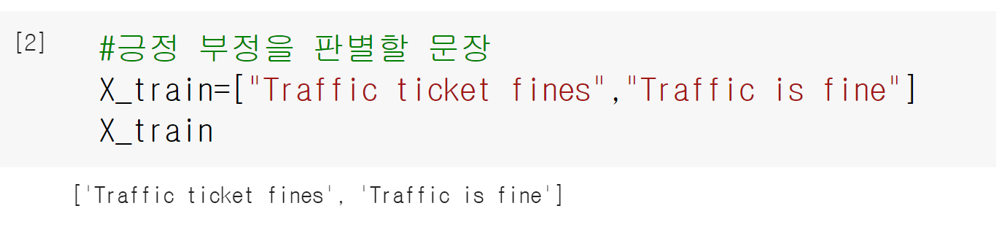

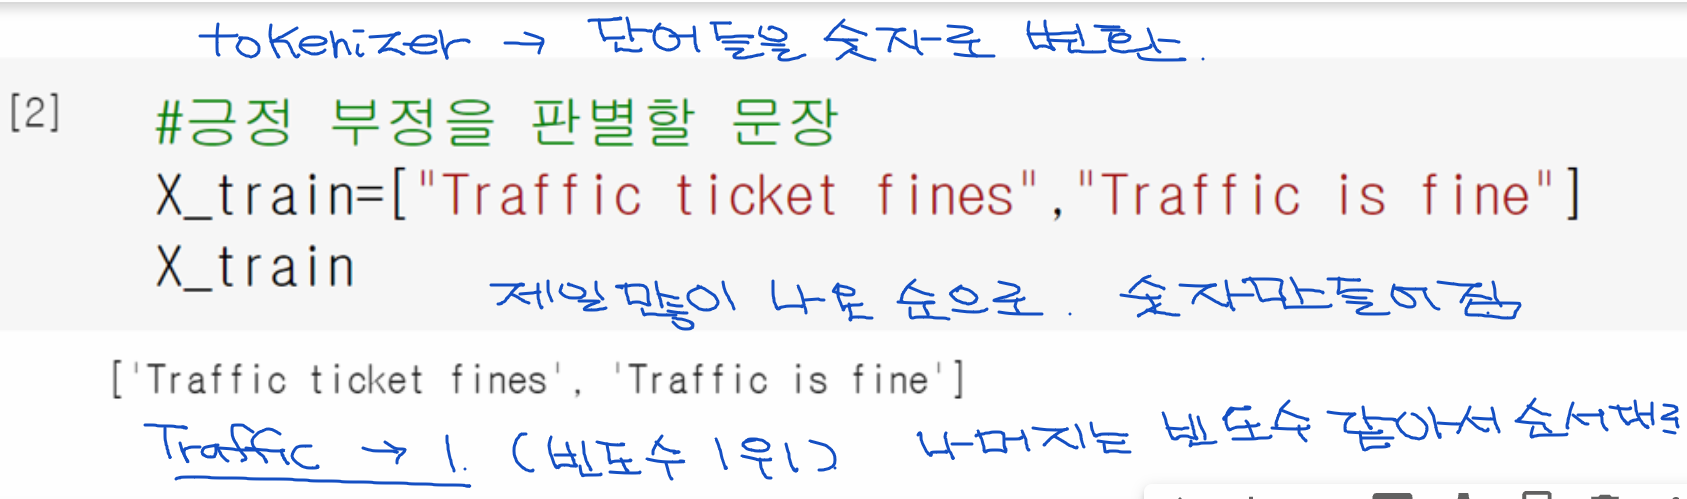

In [35]:
tokenizer.fit_on_texts(X_train)

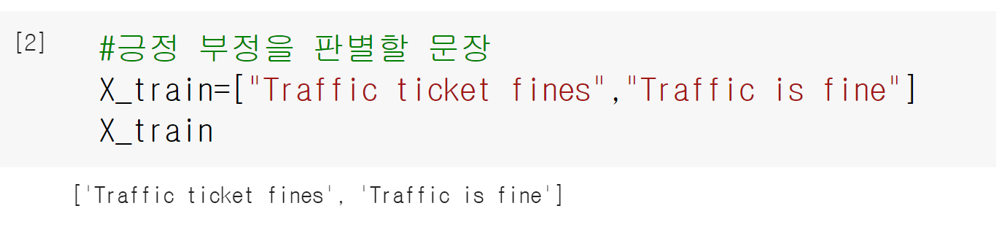

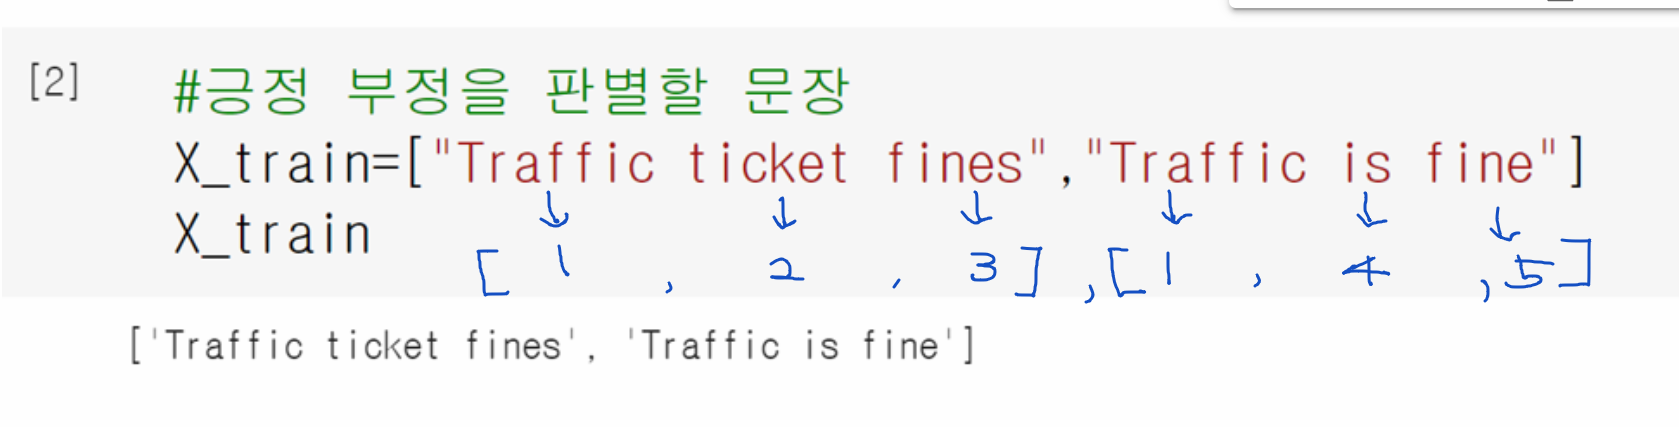

In [36]:
tokenizer.texts_to_sequences(X_train)

[[1, 2, 3], [1, 4, 5]]

In [37]:
tokenizer.word_index

{'fine': 5, 'fines': 3, 'is': 4, 'ticker': 2, 'traffic': 1}

In [38]:
X_tokens = tokenizer.texts_to_sequences(X_train)

In [39]:
X_tokens

[[1, 2, 3], [1, 4, 5]]

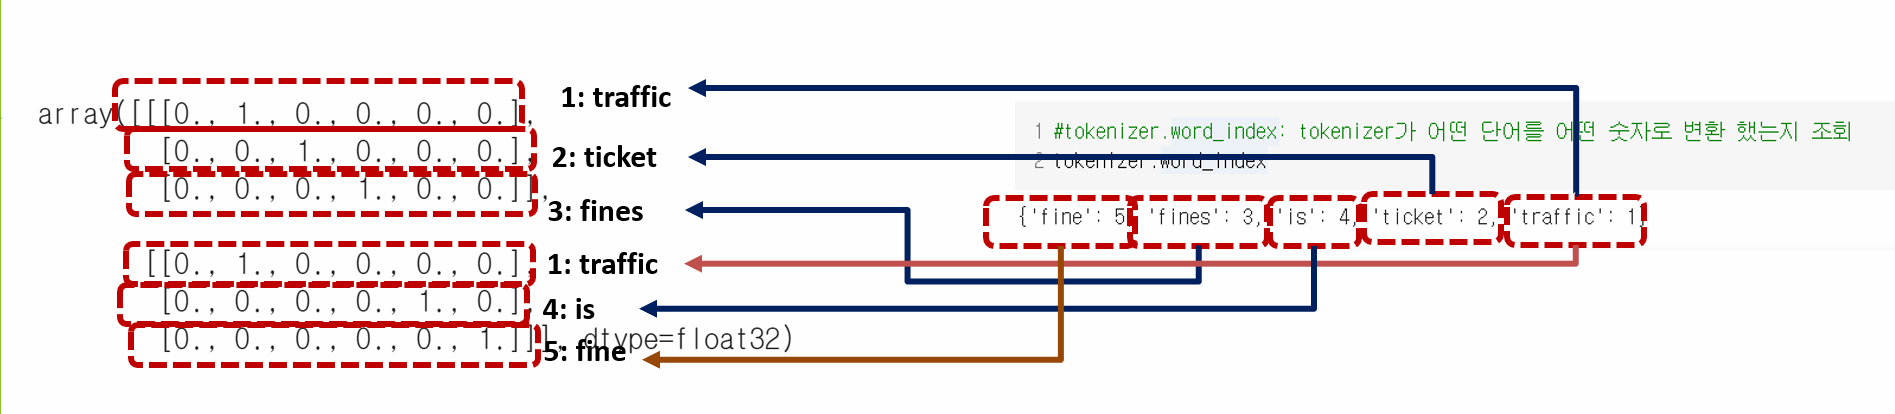

In [40]:
from tensorflow.keras.utils import to_categorical

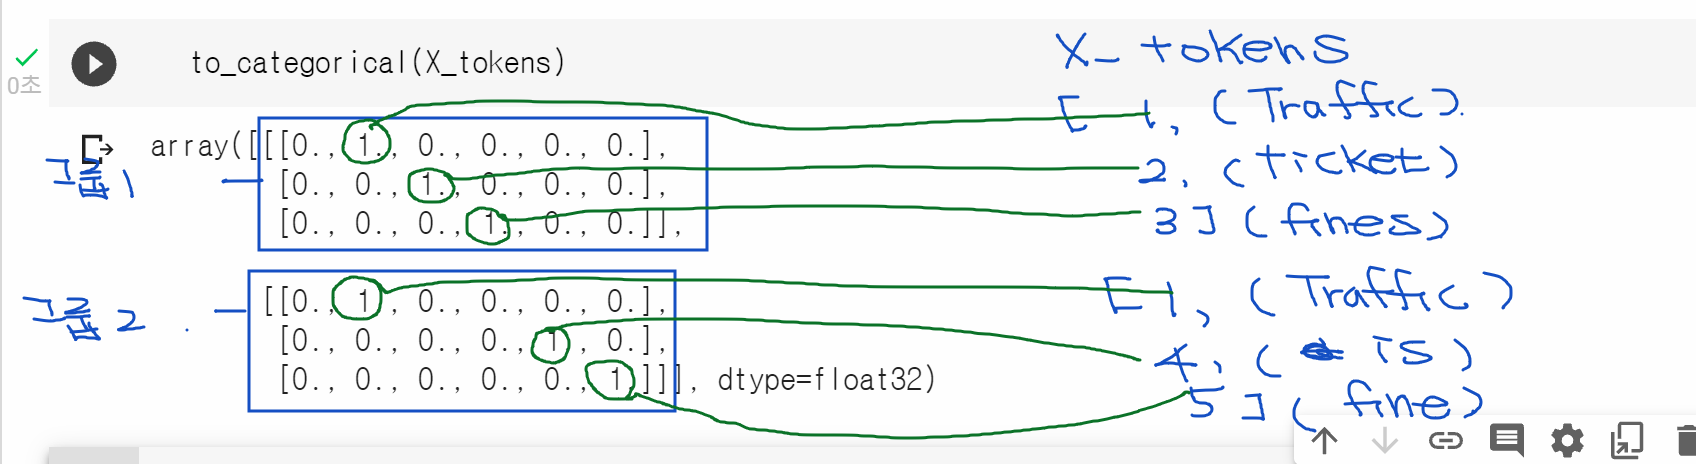

In [41]:
to_categorical(X_tokens)

array([[[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [42]:
X_onehot = to_categorical(X_tokens)

In [43]:
X_onehot

array([[[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
model = Sequential()

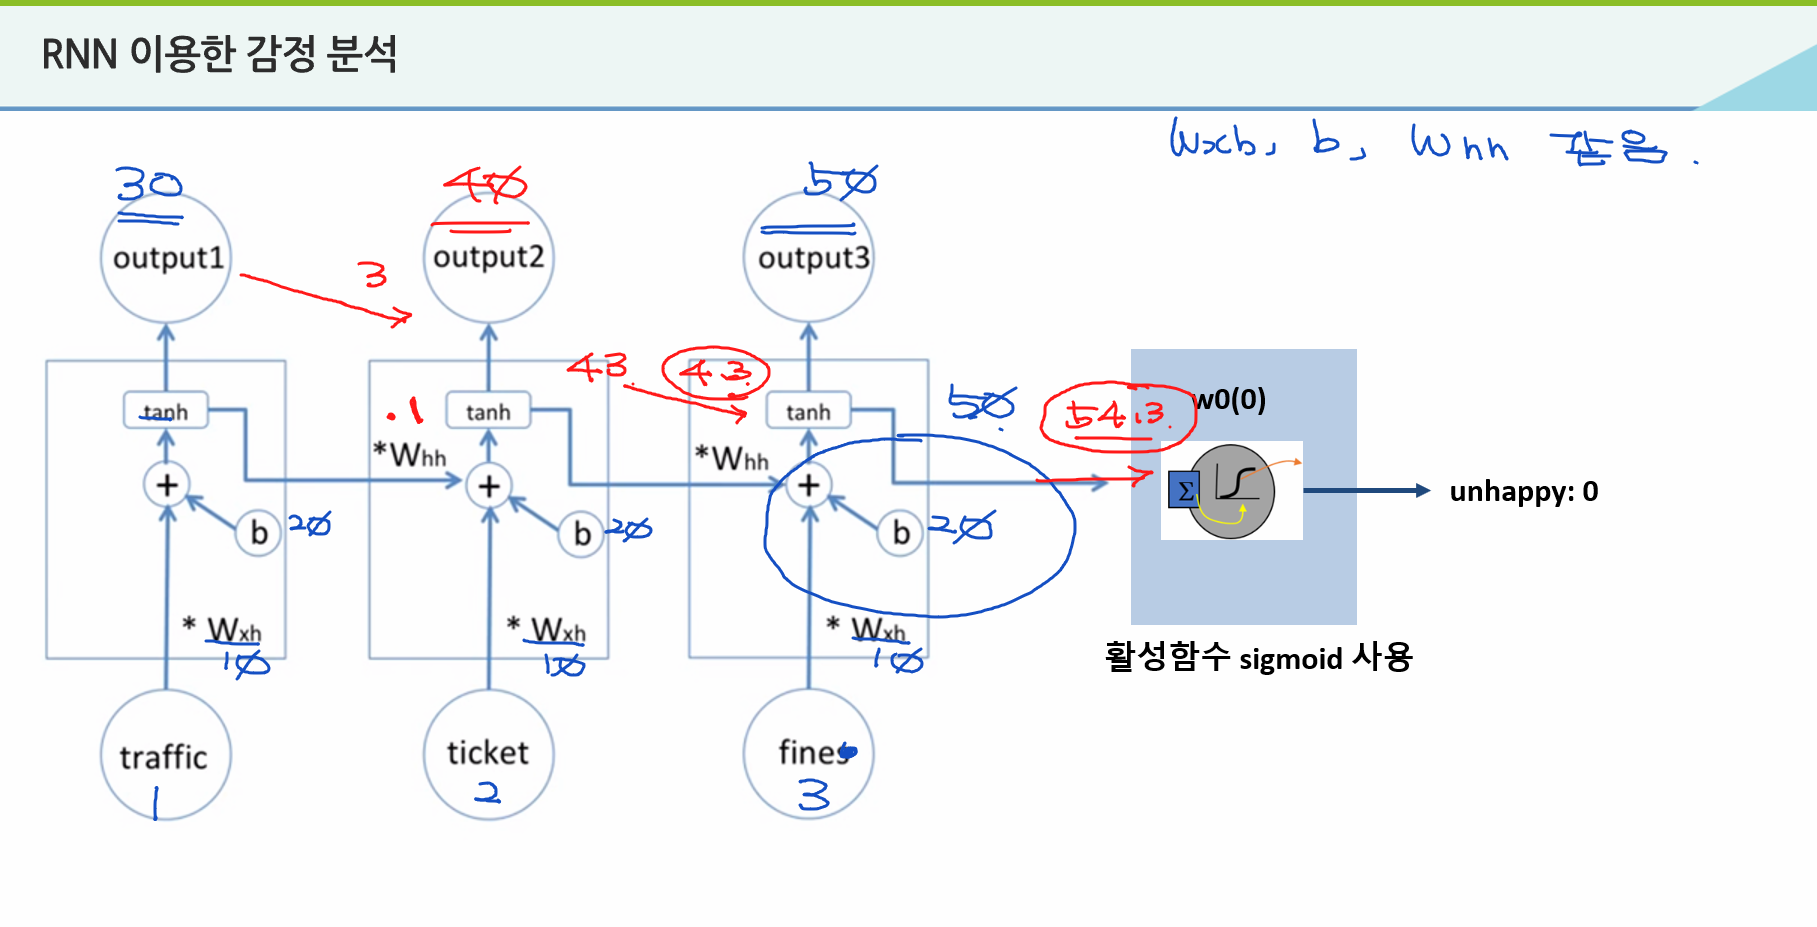

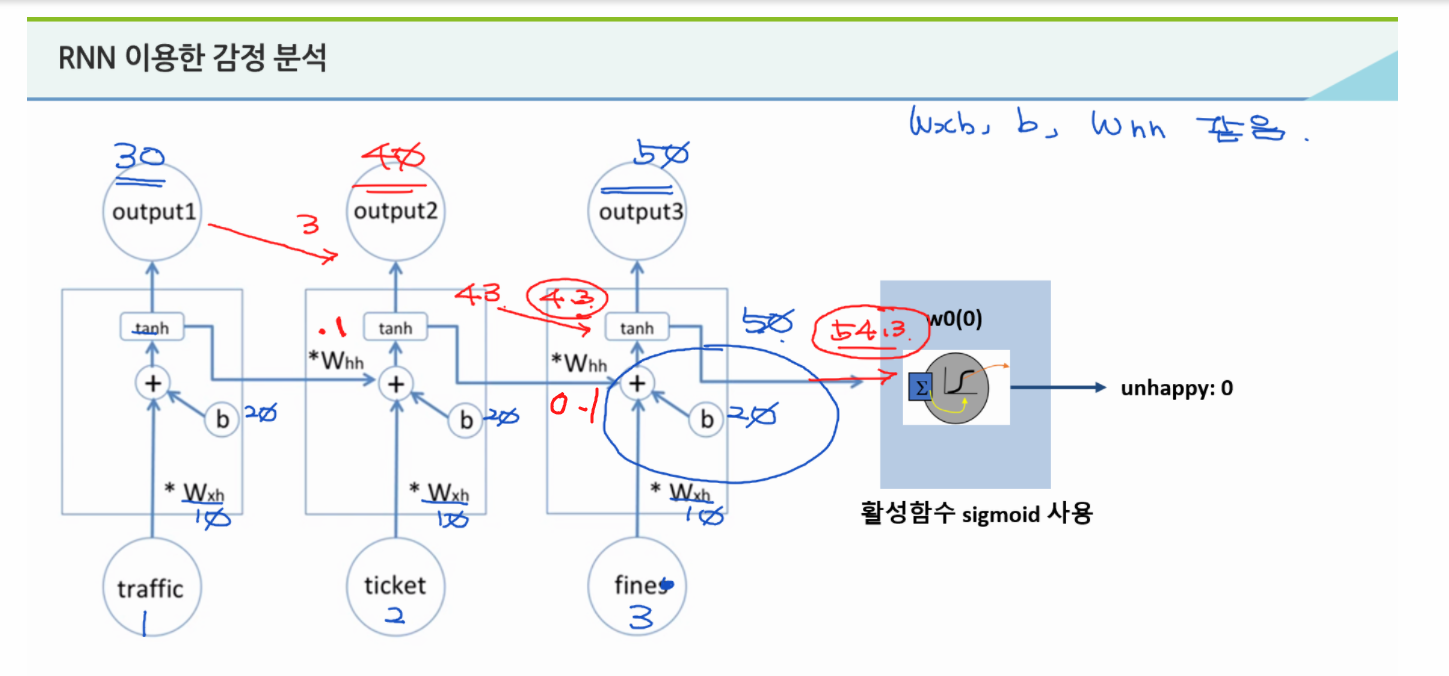

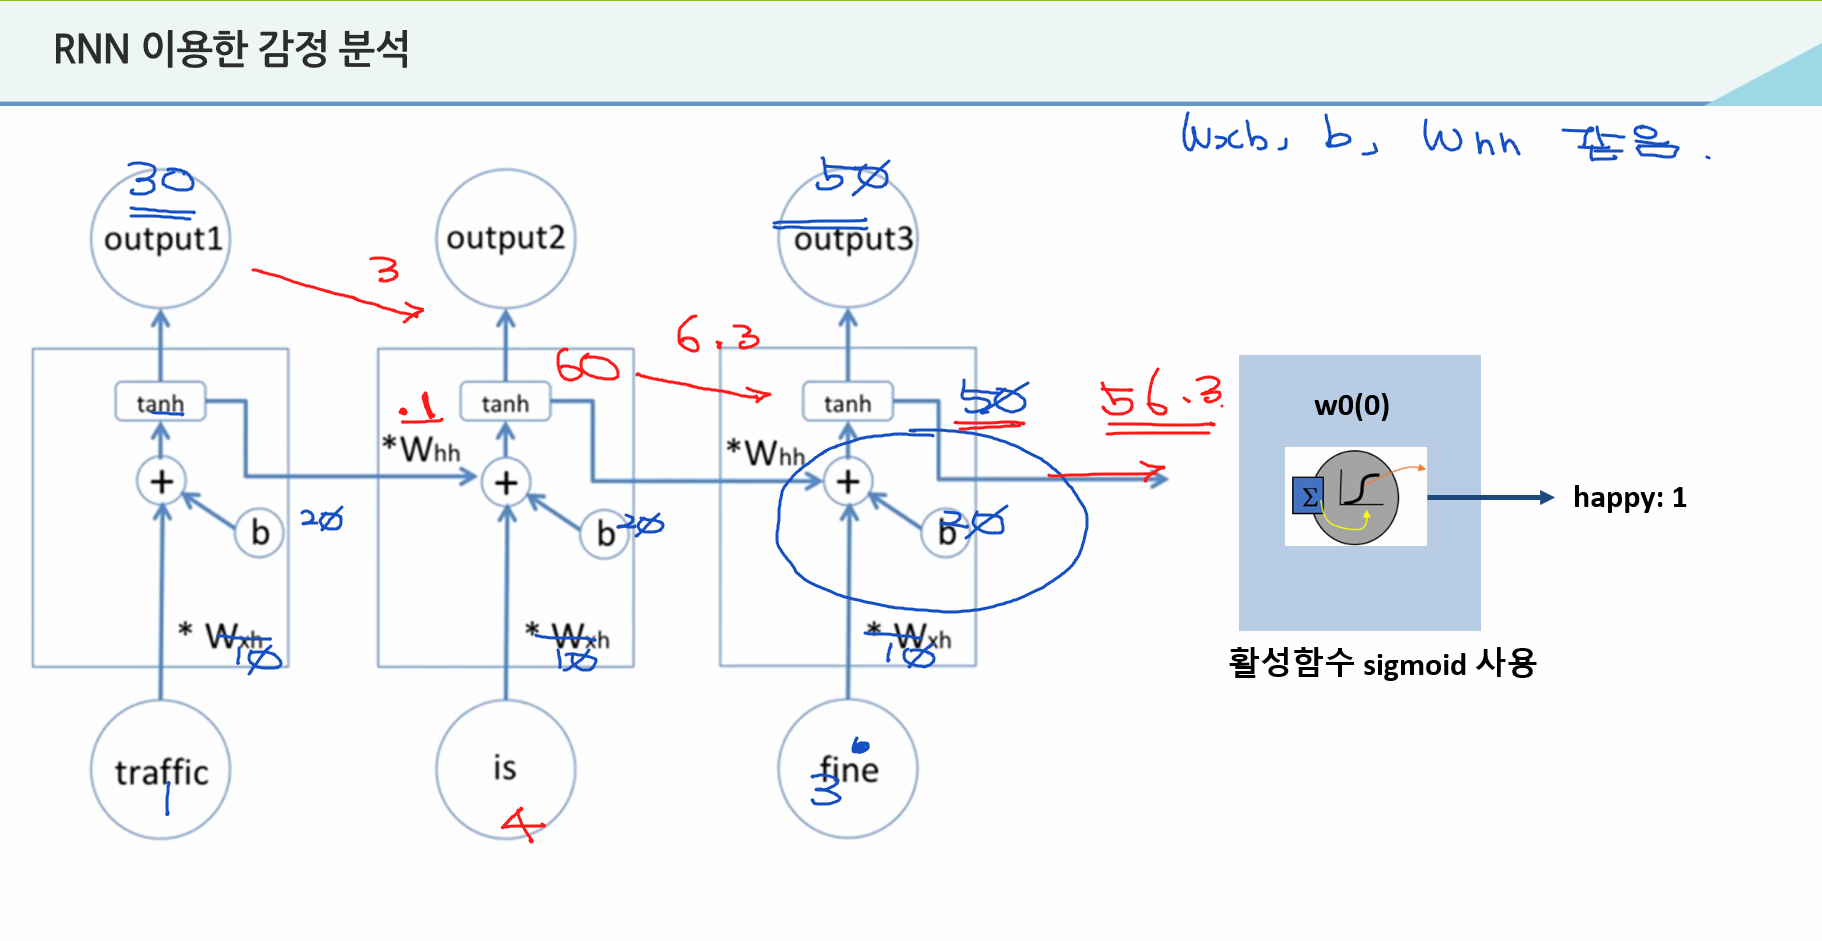

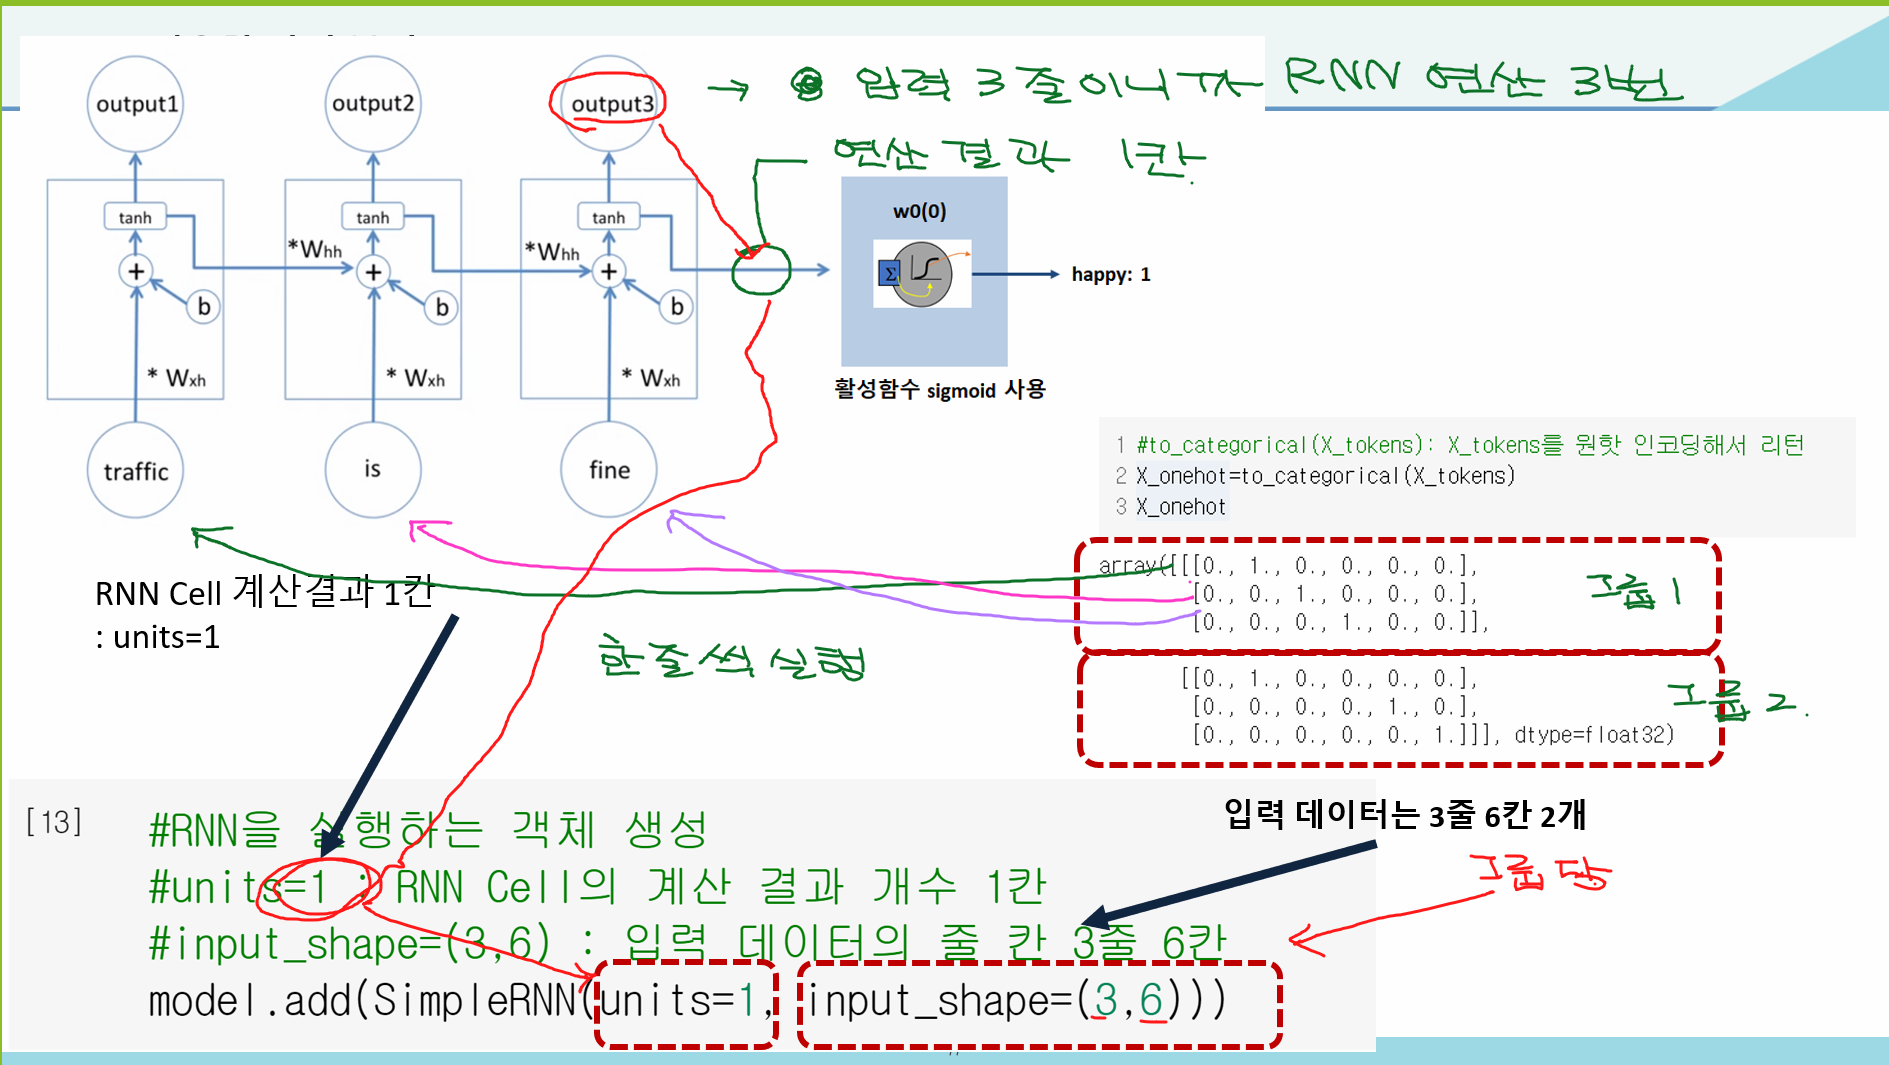

In [46]:
from tensorflow.keras.layers import SimpleRNN

In [47]:
model.add(SimpleRNN(input_shape=(3,6), units=1))

In [48]:
from tensorflow.keras.layers import Dense

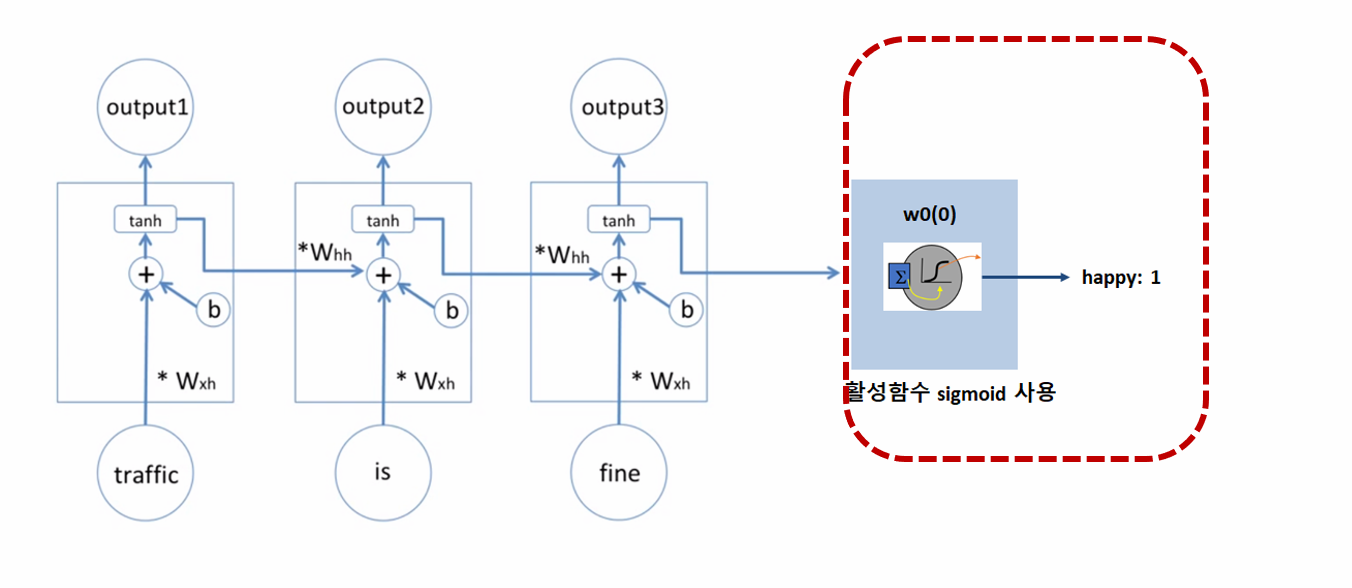

In [49]:
model.add(Dense(1, activation="sigmoid"))

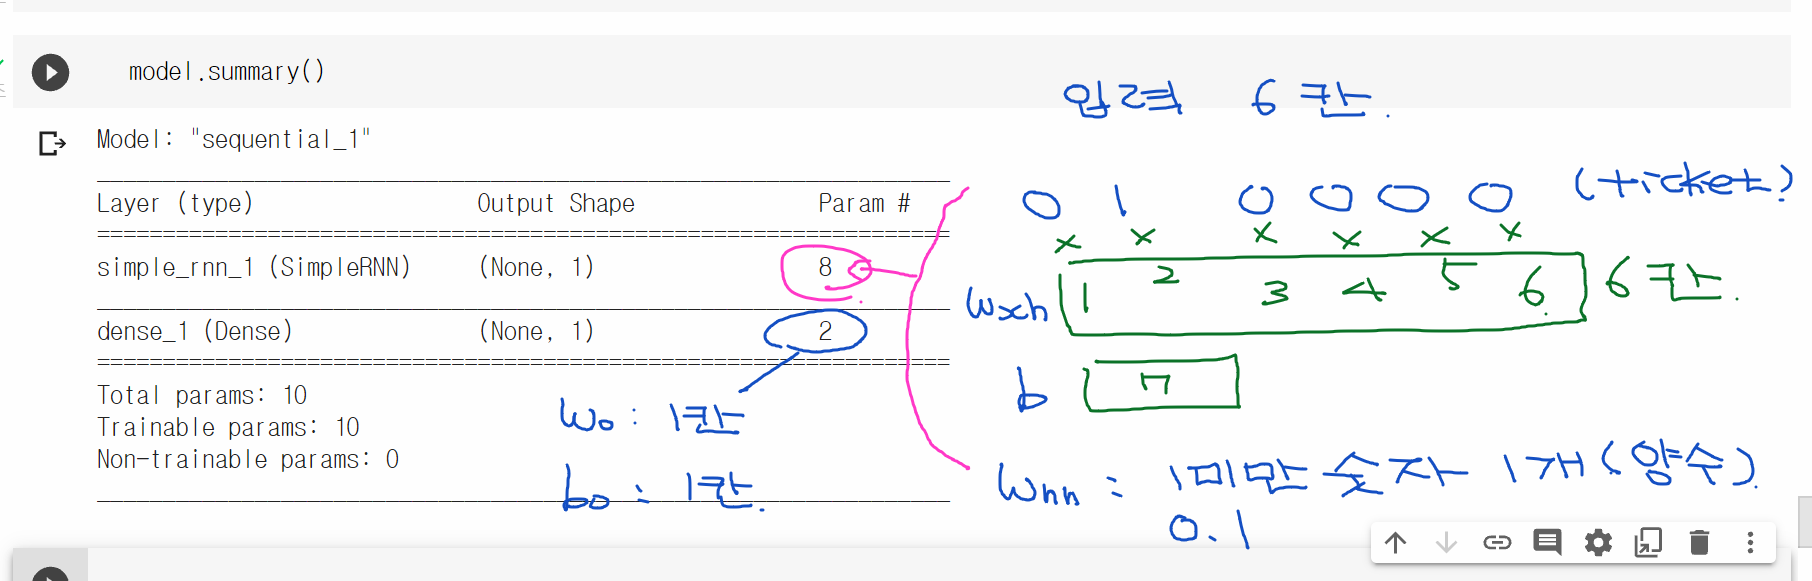

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [51]:
from tensorflow.keras.optimizers import Adam

In [52]:
model.compile(
               loss="binary_crossentropy",
                optimizer=Adam(learning_rate=0.1),
                metrics=["acc"]
              )

In [53]:
model.fit(X_onehot, y_train, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.0302 - acc: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.9173 - acc: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 9ms/step - loss: 0.8468 - acc: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 8ms/step - loss: 0.7941 - acc: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7532 - acc: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7225 - acc: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 8ms/step - loss: 0.7015 - acc: 0.5000
Epoch 8/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6895 - acc: 0.5000
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 0.6851 - acc: 0.5000
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6863 - acc: 0.5000
Epoch 11/30
1/1 [==============================] - 0s 10ms/step - loss: 0.6906 - acc: 0.50

In [54]:
model.predict(X_onehot)

array([[0.18901569],
       [0.86637557]], dtype=float32)

In [55]:
pred = model.predict(X_onehot)

In [56]:
import numpy as np

In [57]:
np.where(pred > 0.5 , 1 , 0)

array([[0],
       [1]])